In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


   

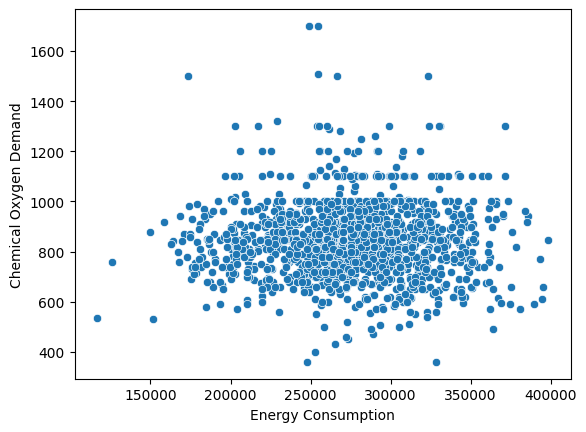

In [38]:
sns.scatterplot(x = 'Energy Consumption', y ='Chemical Oxygen Demand', data = data)
plt.show()

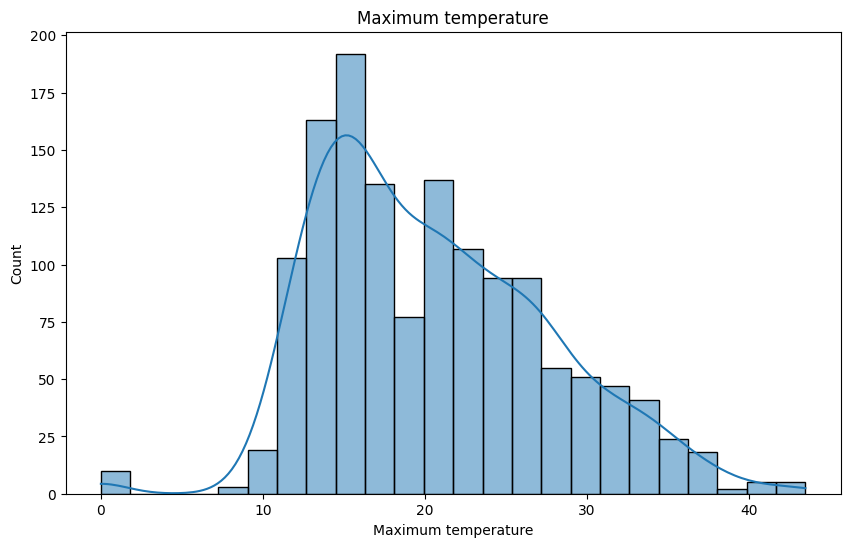

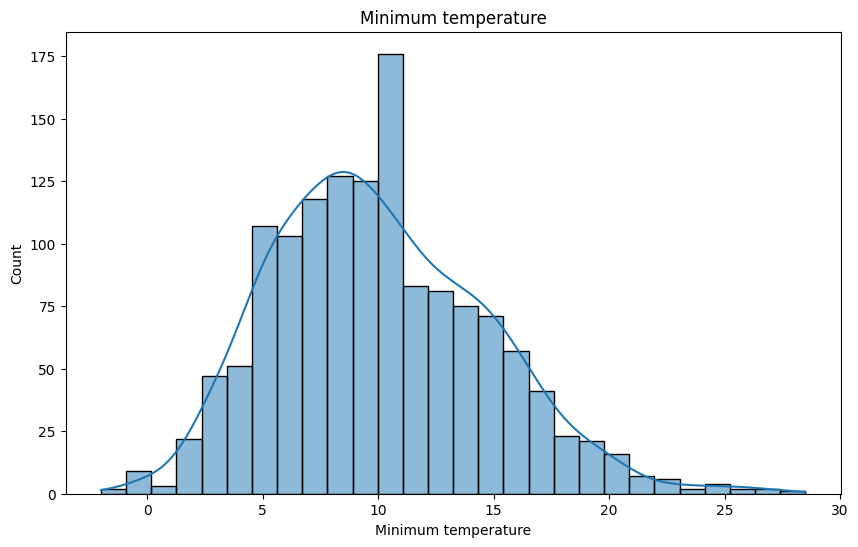

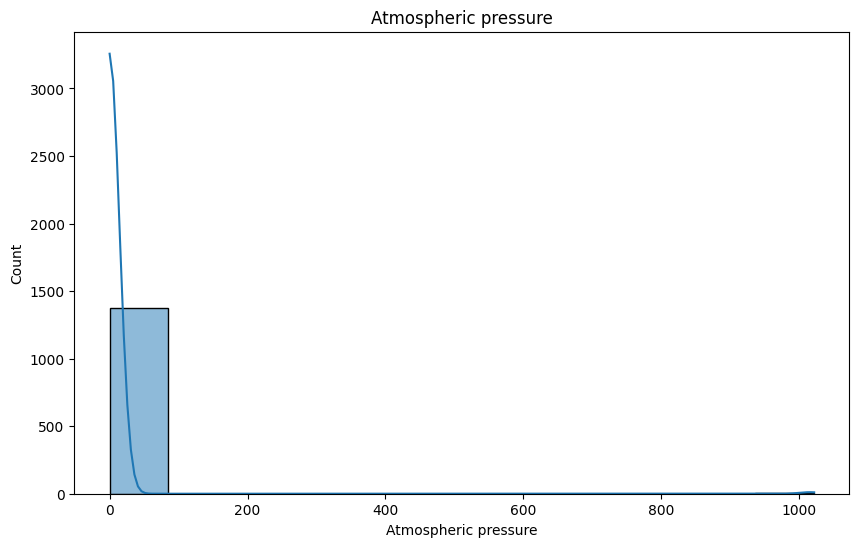

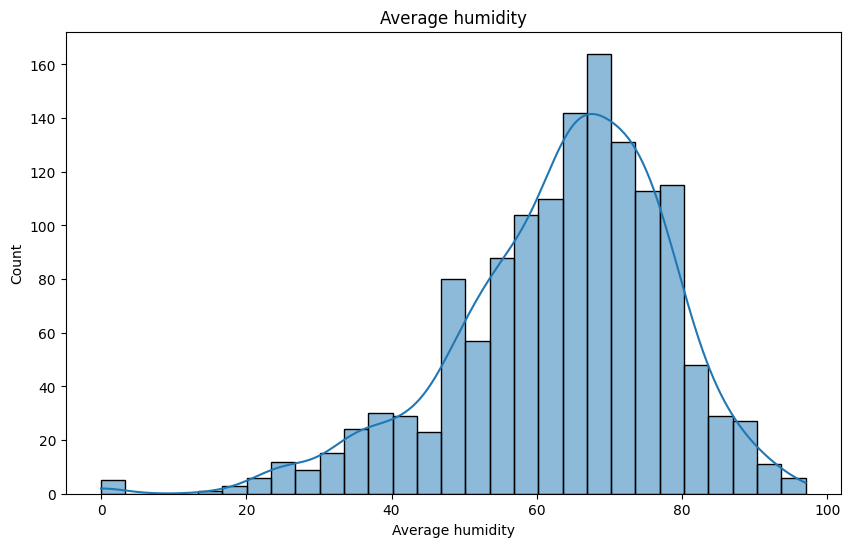

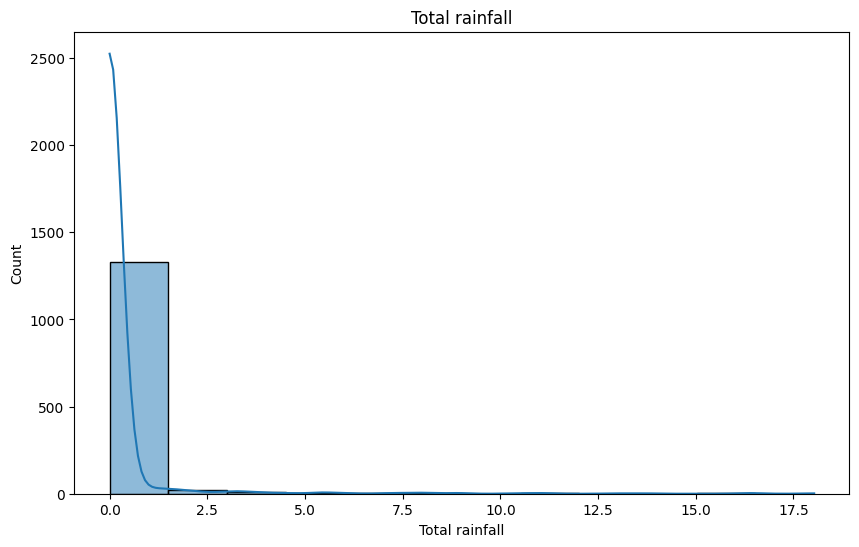

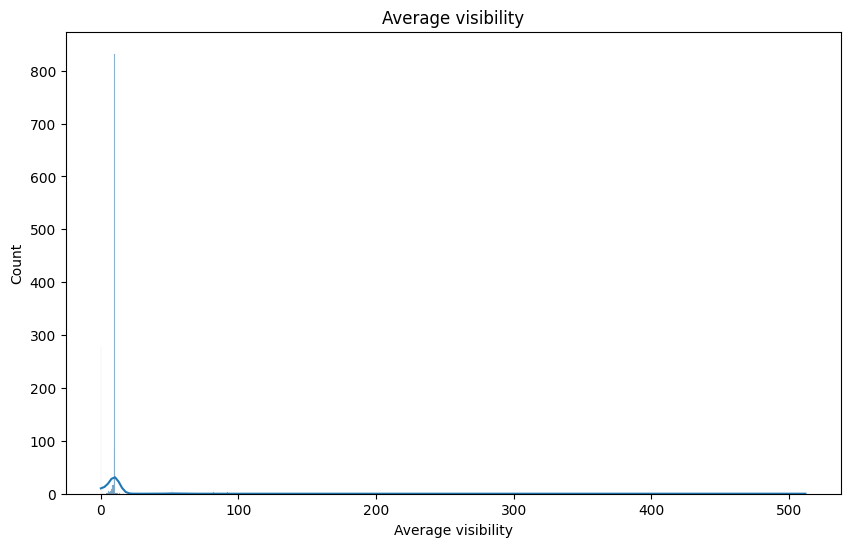

In [39]:
atmospheric_factors = ['Maximum temperature','Minimum temperature','Atmospheric pressure','Average humidity','Total rainfall','Average visibility']
for col in atmospheric_factors:
    plt.figure(figsize=(10,6))
    sns.histplot(data = data, x = col, kde = True)
    plt.title(f'{col}')
    

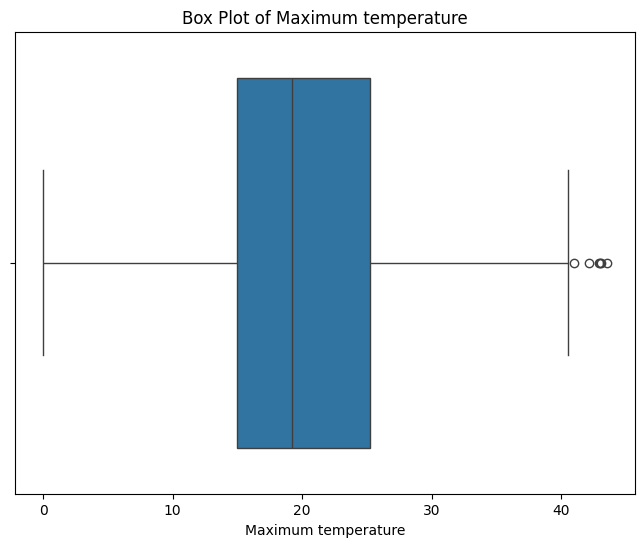

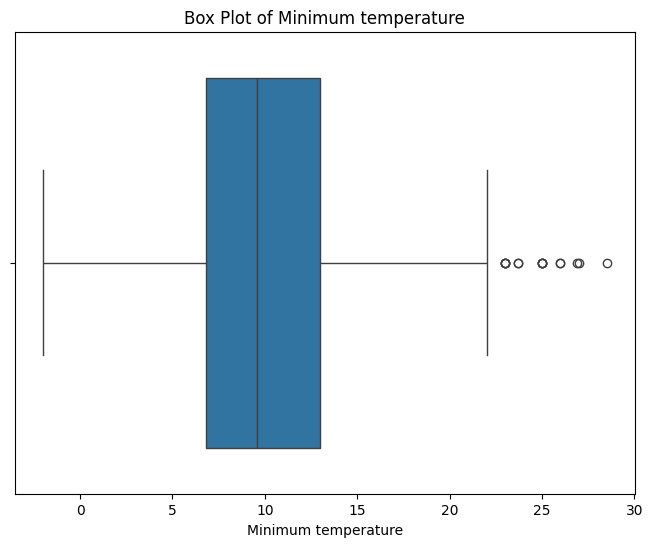

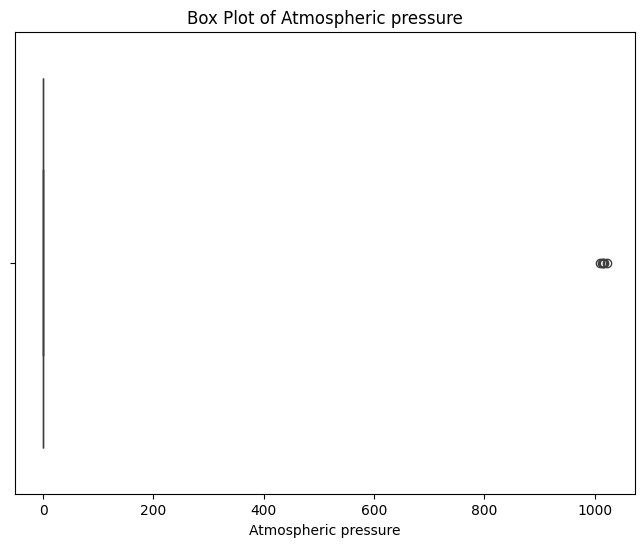

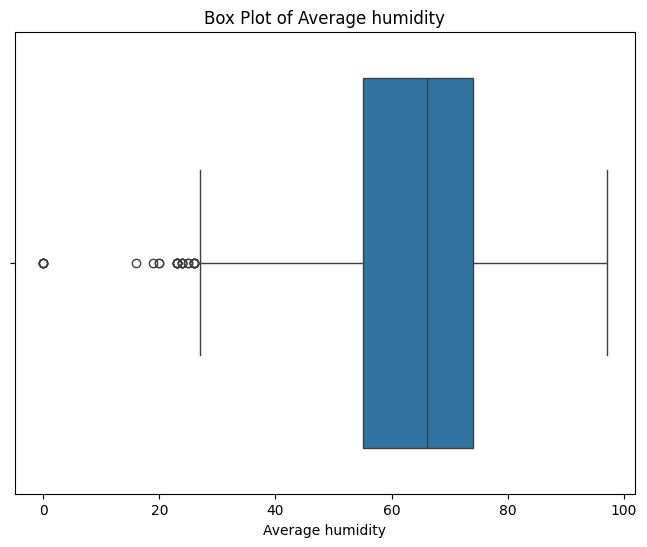

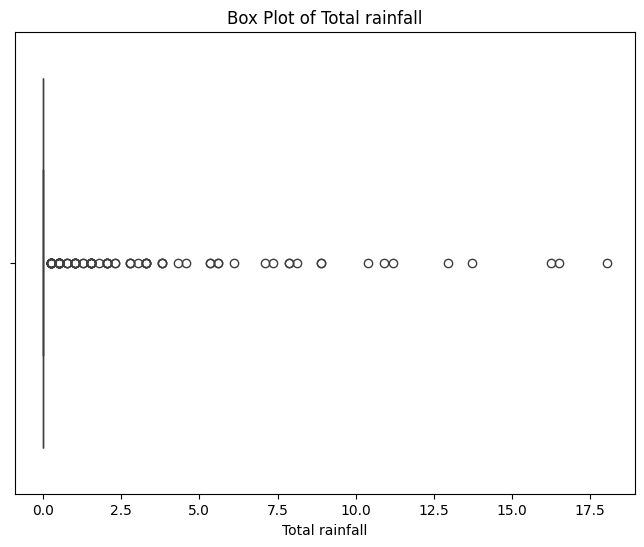

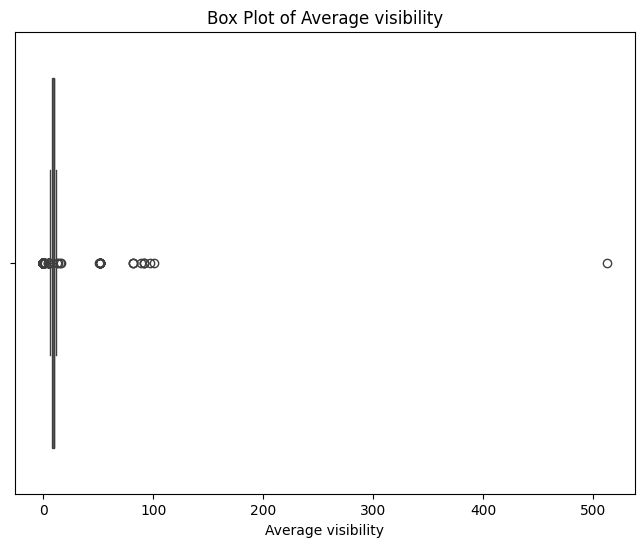

In [40]:
for col in atmospheric_factors:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [41]:
data = pd.read_csv('third.csv')
data = data.drop(columns=['Unnamed: 0'])
data['Optimal'] = np.where(data['Average Outflow'] > data['Average Inflow'], 1, 0)
X = data.drop(columns=['Optimal'])
y = data['Optimal']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [43]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


In [44]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [45]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [46]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [47]:

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [48]:
def evaluate_model(name, y_test, y_pred):
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

In [49]:

models = {
    "Logistic Regression": y_pred_logistic,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "Gradient Boosting": y_pred_gb
}


In [50]:
for model_name, predictions in models.items():
    evaluate_model(model_name, y_test, predictions)


Model: Logistic Regression
Accuracy: 0.9819
F1 Score: 0.9412
Confusion Matrix:
[[232   0]
 [  5  40]]


Model: KNN
Accuracy: 0.8845
F1 Score: 0.5152
Confusion Matrix:
[[228   4]
 [ 28  17]]


Model: Decision Tree
Accuracy: 0.9531
F1 Score: 0.8602
Confusion Matrix:
[[224   8]
 [  5  40]]


Model: Random Forest
Accuracy: 0.9495
F1 Score: 0.8250
Confusion Matrix:
[[230   2]
 [ 12  33]]


Model: SVM
Accuracy: 0.9278
F1 Score: 0.7143
Confusion Matrix:
[[232   0]
 [ 20  25]]


Model: Gradient Boosting
Accuracy: 0.9819
F1 Score: 0.9425
Confusion Matrix:
[[231   1]
 [  4  41]]




In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose=1)
rf_grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
evaluate_model("Tuned Random Forest", y_test, y_pred_rf_tuned)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
